In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load dataset and pre-processing



In [7]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mnn59/helli-ai-research/main/assignments/01-regression/housePrice.csv')

dataset['Area'] = pd.to_numeric(dataset['Area'], errors='coerce')
dataset['Address'] = dataset['Address'].astype('category').cat.codes
dataset[dataset['Area'] > 250] = np.NaN
dataset = dataset.dropna()

dataset.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1.0,True,True,True,156.0,1.850000e+09,61666.67
1,60.0,1.0,True,True,True,156.0,1.850000e+09,61666.67
2,79.0,2.0,True,True,True,117.0,5.500000e+08,18333.33
3,95.0,2.0,True,True,True,152.0,9.025000e+08,30083.33
4,123.0,2.0,True,True,True,150.0,7.000000e+09,233333.33


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Room'}>],
       [<Axes: title={'center': 'Address'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Price(USD)'}>, <Axes: >]], dtype=object)

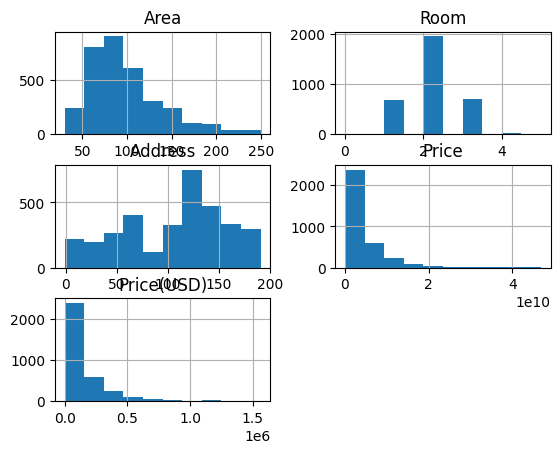

In [8]:
dataset.hist()

In [13]:
predicate = ['Price(USD)', 'Price']
features = dataset.columns.difference(predicate)
x = dataset[features]
y = dataset[predicate]

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_poly', PolynomialFeatures()),
    ('model', LinearRegression()),
])

pipe.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
y_pred = pipe.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae_perc = mean_absolute_percentage_error(y_test, y_pred)
print(f'{mse=}\t{mae_perc=}')

mse=4.4175055051820006e+18	mae_perc=1.0010096068142618
